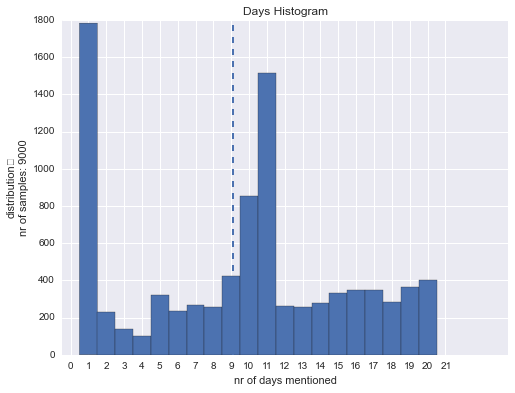

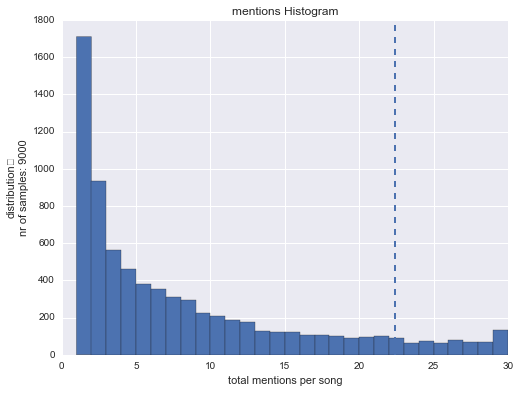

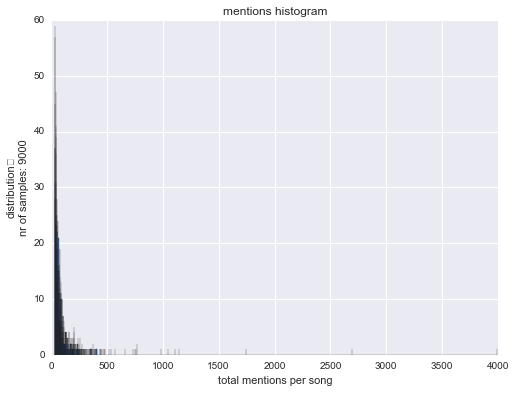

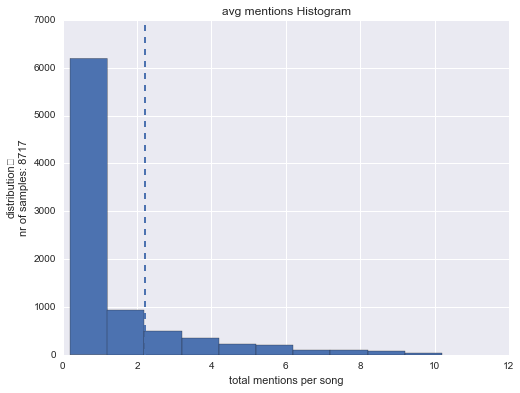

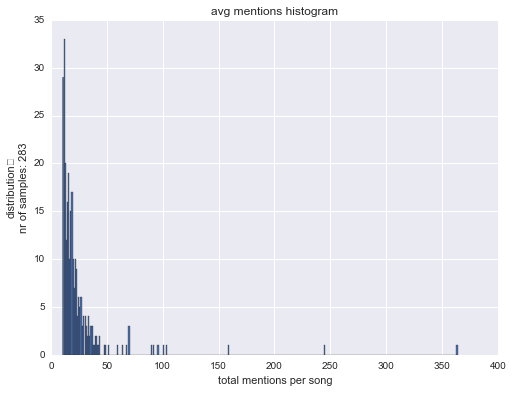

In [4]:
import pymongo
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from pymongo import MongoClient
from bson.objectid import ObjectId

sns.set(color_codes=True)
%matplotlib inline

def print_version_info():
    print('Version info for imports')
    print('numpy version:', np.__version__)
    print('pandas version:', pd.__version__)
    print('scikit-learn version:', sk.__version__)
    print('matplotlib version:', matplotlib.__version__)
    print('pymongo version:', pymongo.version)
    print('\r\n')

df_songs = pd.DataFrame(columns=['_id','artist','title','mbid'])
df_correct = pd.DataFrame(columns=['mbid', 'day', 'mentions'])

df_songs = pd.read_csv("C:/ADS/songs_mbid_records.csv", sep=',',engine='python')#10k unique songs
df_correct = pd.read_csv("C:/ADS/test_set_songs_appended.csv", sep=',',engine='python')#9k + null values

def draw_days_histo():
    X_ddh = []
    for unique_song in pd.unique(df_correct.mbid.ravel()):#remove slice to do all ( takes awhile )
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]
        X_ddh.append(len(df_partial))
    samples = 'nr of samples: ' + str(len(pd.unique(df_correct.mbid.ravel())))
    binwidth = 1
    plt.figure(figsize=(8,6))
    plt.hist(X_ddh, bins=np.arange(min(X_ddh), max(X_ddh) + binwidth, binwidth))
    avg = np.mean(X_ddh)
    plt.axvline(avg, color='b', linestyle='dashed', linewidth=2)
    plt.title('Days Histogram')
    plt.xlabel('nr of days mentioned')
    plt.ylabel('distribution\r\n' + samples)
    tickels_pos = np.arange(0 + 0.5, max(X_ddh) + 0.5 + binwidth)
    tickels_lbl = np.arange(0, max(X_ddh) + binwidth)
    plt.xticks(tickels_pos, tickels_lbl)
    plt.show()

def draw_mentions_histo_kl():
    X_dmh = []
    X_dmh_kl = []
    for unique_song in pd.unique(df_correct.mbid.ravel()):#remove slice to do all ( takes awhile )
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]
        X_dmh.append(df_partial.mentions.sum())   
    for x_kl in X_dmh:
        if(x_kl <= 30):
            X_dmh_kl.append(x_kl)
    samples = 'nr of samples: ' + str(len(X_dmh_kl))
    samples = 'nr of samples: ' + str(len(pd.unique(df_correct.mbid.ravel())))
    binwidth = 1
    plt.figure(figsize=(8,6))
    plt.hist(X_dmh, bins=np.arange(min(X_dmh_kl), max(X_dmh_kl) + binwidth, binwidth))
    avg = np.mean(X_dmh)
    plt.axvline(avg, color='b', linestyle='dashed', linewidth=2)
    plt.title('mentions Histogram')
    plt.xlabel('total mentions per song')
    plt.ylabel('distribution\r\n' + samples)
    plt.show()
    
def draw_mentions_histo_b():
    X_dmh = []
    X_dmh_b = []
    for unique_song in pd.unique(df_correct.mbid.ravel()):#remove slice to do all ( takes awhile )
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]
        X_dmh.append(df_partial.mentions.sum())  
    for x_b in X_dmh:
        if(x_b > 30):
            X_dmh_b.append(x_b)
    samples = 'nr of samples: ' + str(len(X_dmh_b))
    samples = 'nr of samples: ' + str(len(pd.unique(df_correct.mbid.ravel())))
    binwidth = 1
    plt.figure(figsize=(8,6))
    plt.hist(X_dmh_b, bins=np.arange(25, max(X_dmh_b) + binwidth, binwidth))
    plt.title('mentions histogram')
    plt.xlabel('total mentions per song')
    plt.ylabel('distribution\r\n' + samples)
    plt.show()
    
def draw_avg_mentions_histo_kl():
    X_damh = []
    X_damh_kl = []
    for unique_song in pd.unique(df_correct.mbid.ravel()):#remove slice to do all ( takes awhile )
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]
        X_damh.append(df_partial.mentions.sum() / len(df_partial))     
    for x_kl in X_damh:
        if(x_kl <= 10):
            X_damh_kl.append(x_kl)
    samples = 'nr of samples: ' + str(len(X_damh_kl))
    binwidth = 1
    plt.figure(figsize=(8,6))
    plt.hist(X_damh_kl, bins=np.arange(min(X_damh_kl), max(X_damh_kl) + binwidth, binwidth))
    avg = np.mean(X_damh)
    plt.axvline(avg, color='b', linestyle='dashed', linewidth=2)
    plt.title('avg mentions Histogram')
    plt.xlabel('total mentions per song')
    plt.ylabel('distribution\r\n' + samples)
    plt.show()
    
def draw_avg_mentions_histo_b():
    X_damh = []
    X_damh_b = []
    for unique_song in pd.unique(df_correct.mbid.ravel()):#remove slice to do all ( takes awhile )
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]
        X_damh.append(df_partial.mentions.sum() / len(df_partial))     
    for x_b in X_damh:
        if(x_b > 10):
            X_damh_b.append(x_b)
    samples = 'nr of samples: ' + str(len(X_damh_b))
    binwidth = 1
    plt.figure(figsize=(8,6))
    plt.hist(X_damh_b, bins=np.arange(min(X_damh_b), max(X_damh_b) + binwidth, binwidth))
    plt.title('avg mentions histogram')
    plt.xlabel('total mentions per song')
    plt.ylabel('distribution\r\n' + samples)
    plt.show()
 

draw_days_histo()
draw_mentions_histo_kl()
draw_mentions_histo_b()
draw_avg_mentions_histo_kl()
draw_avg_mentions_histo_b()

In [53]:

df_songs = pd.DataFrame(columns=['_id','artist','title','mbid'])
df_correct = pd.DataFrame(columns=['mbid', 'day', 'mentions'])

df_songs = pd.read_csv("C:/ADS/songs_mbid_records.csv", sep=',',engine='python')#10k unique songs
df_correct = pd.read_csv("C:/ADS/test_set_songs_appended.csv", sep=',',engine='python')#9k + null values

def get_sevendays(df_seven): 
    count_less = 0
    count_more = 0
    for unique_song in pd.unique(df_songs.mbid.ravel()[:100]):
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]#partial will be overwritten with new data
        df_partial_sort = df_partial.sort_values(by='day', ascending=[1])#sort on date
        if(len(df_partial) < 7 ):
            count_less = count_less + 1
        if(len(df_partial) >= 7 ):
            if(len(df_seven) == 0 ):
                df_seven = df_partial_sort[:7]
            else:
                df_seven = df_seven.append(df_partial_sort[:7])             
            count_more = count_more + 1
    print(count_less)
    print(count_more)

df_seven = pd.DataFrame(columns=['mbid', 'day', 'mentions'])

get_sevendays(df_seven)

29
71


C:\Users\Nick\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


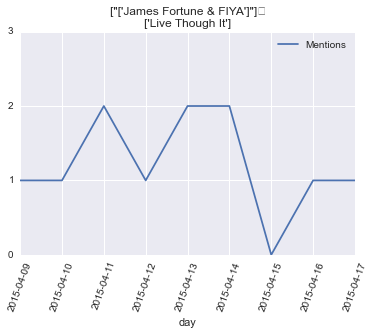

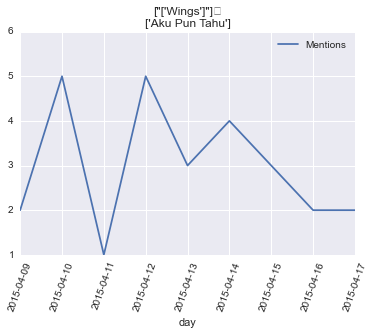

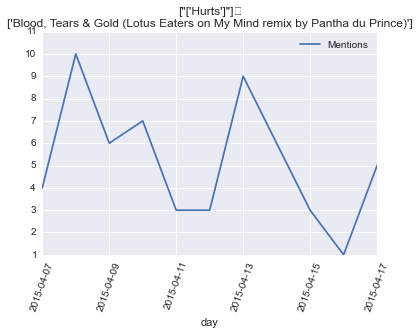

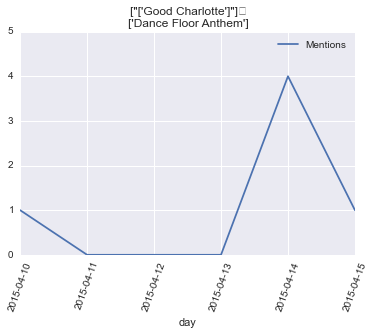

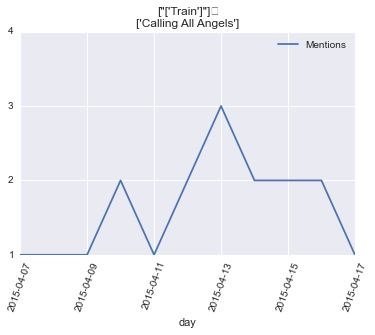

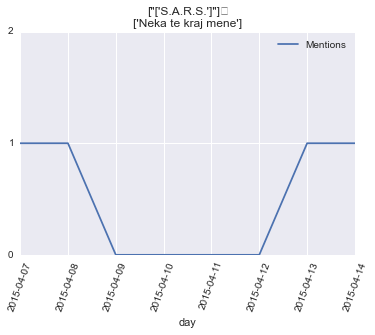

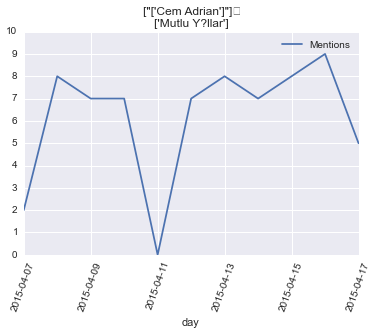

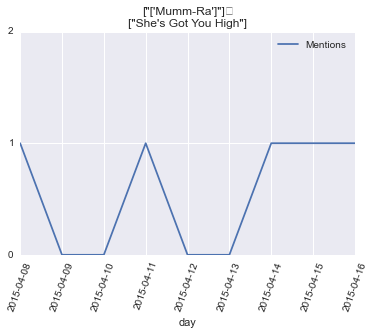

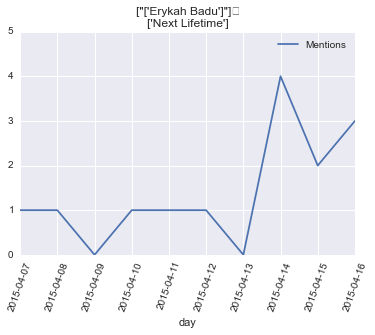

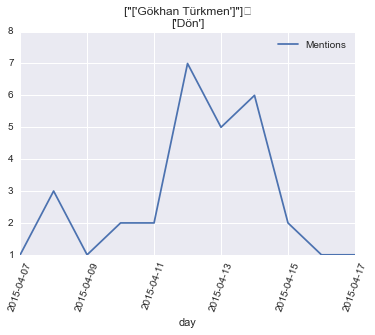

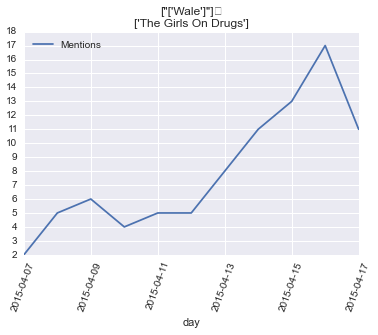

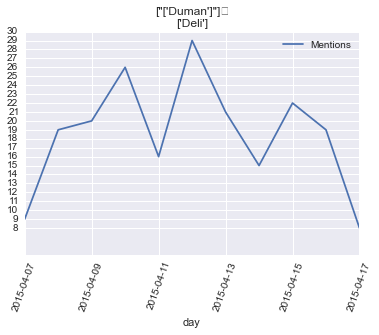

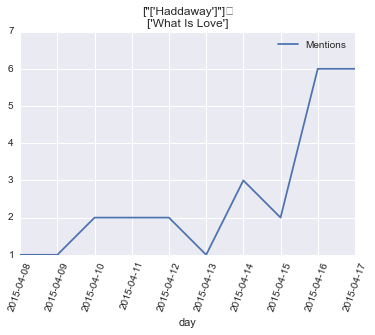

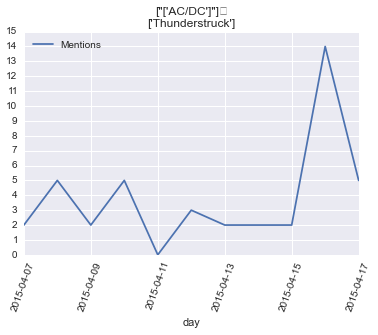

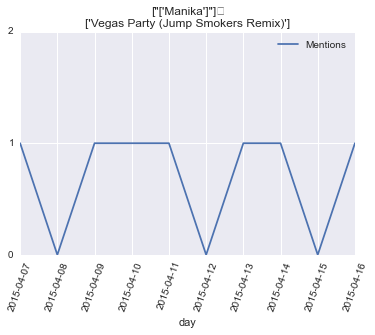

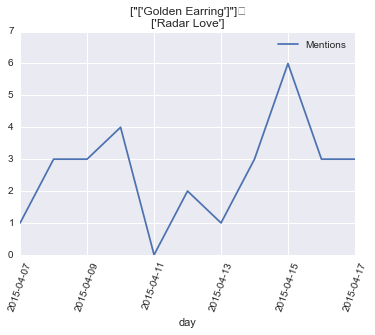

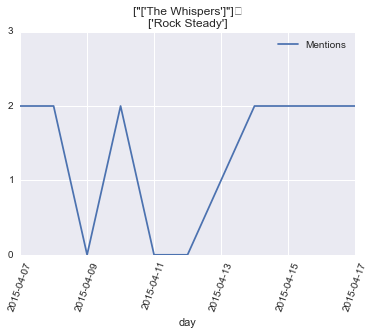

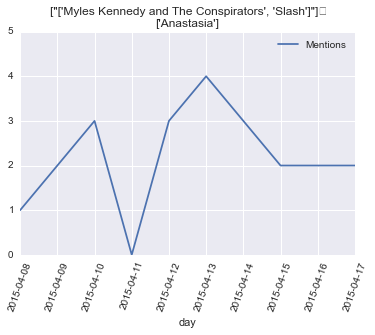

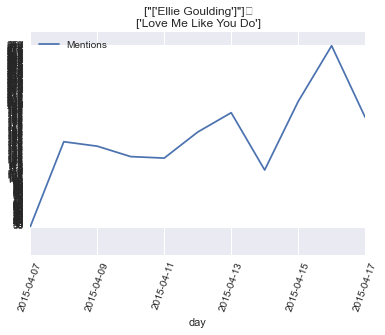

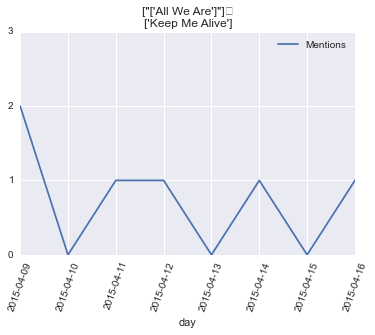

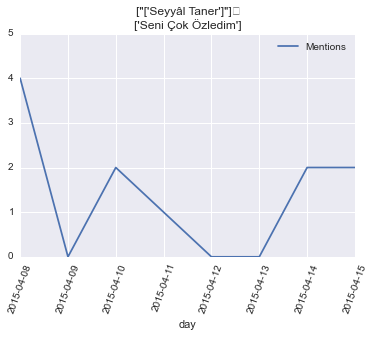

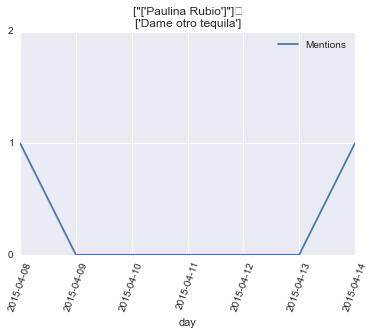

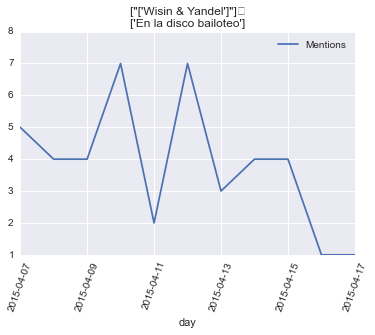

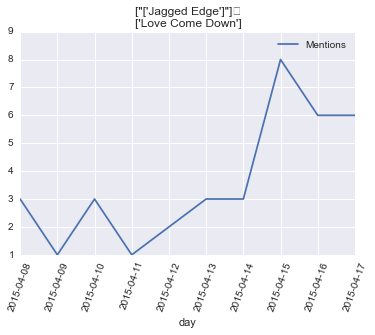

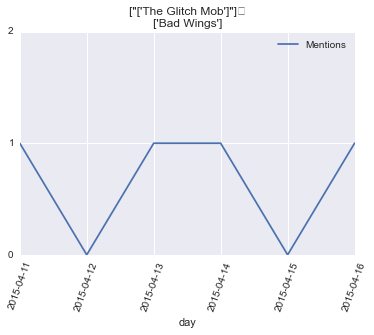

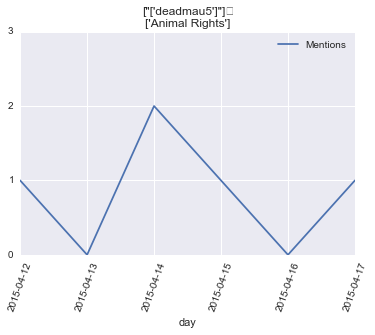

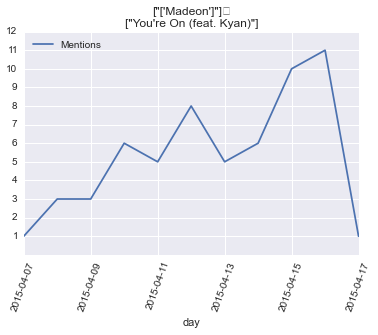

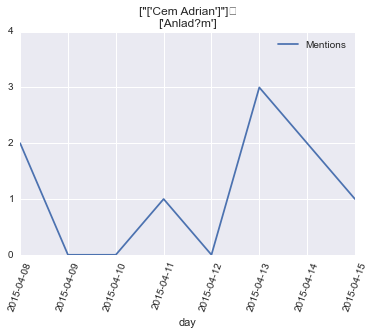

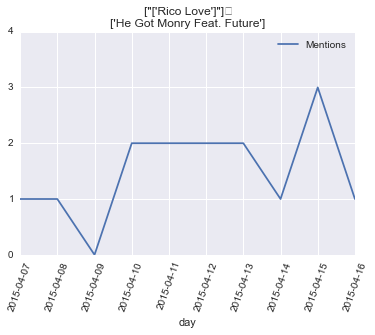

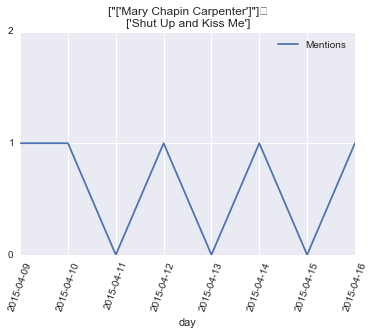

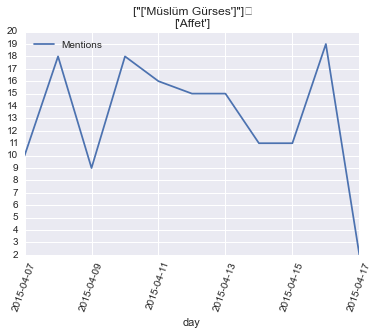

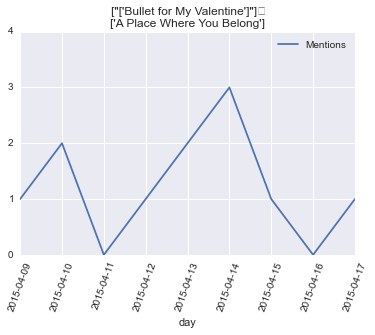

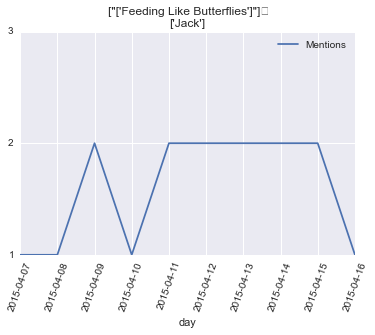

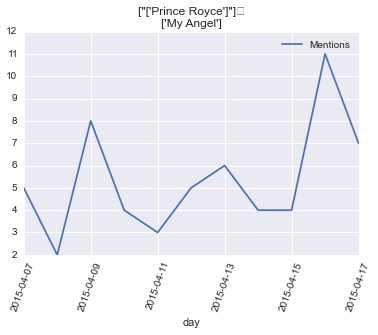

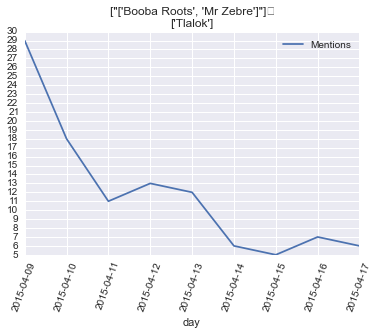

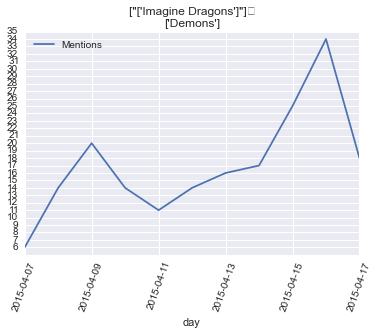

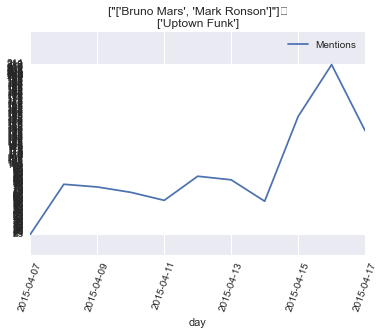

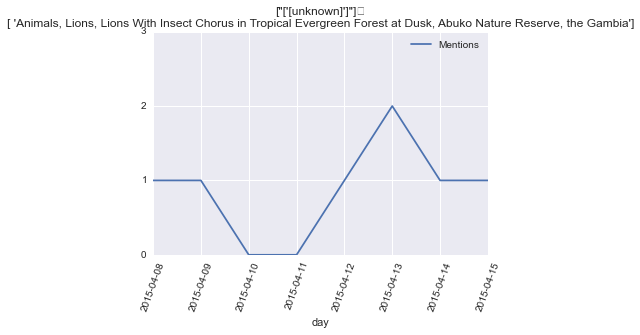

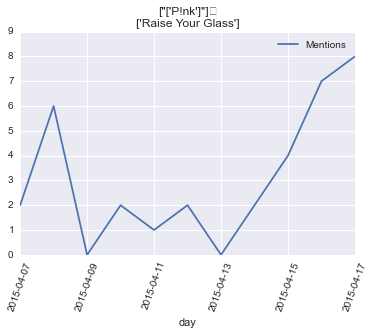

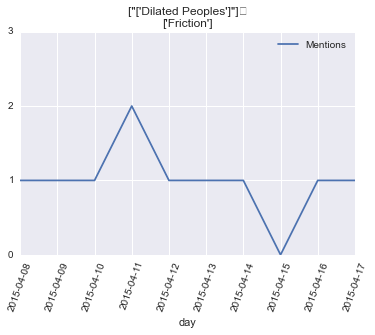

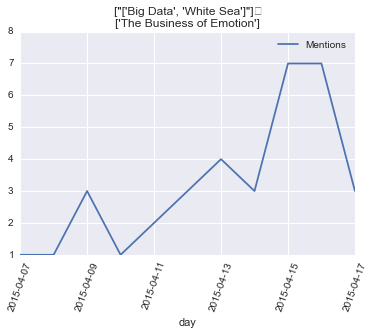

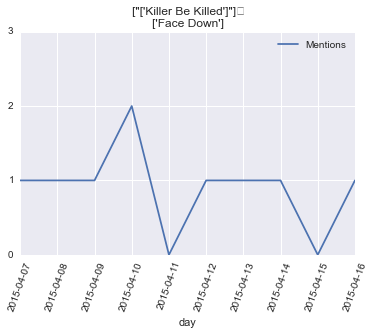

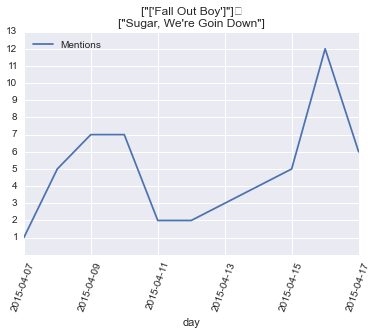

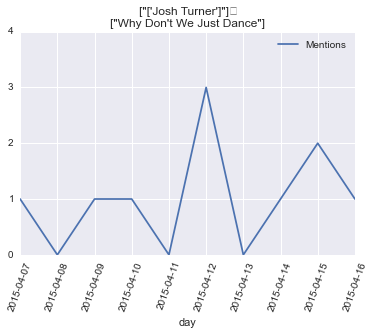

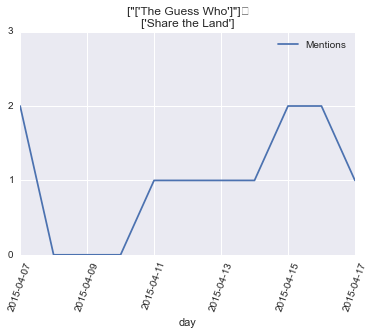

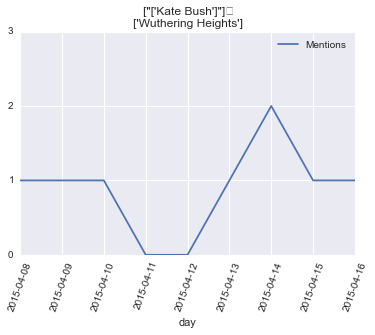

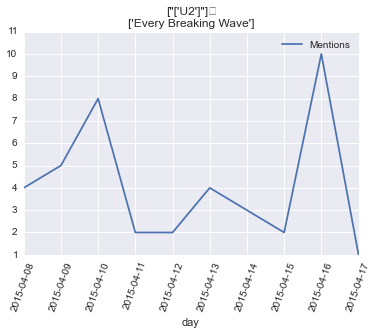

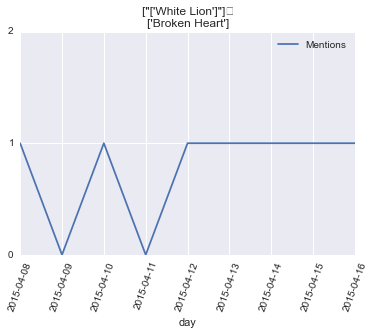

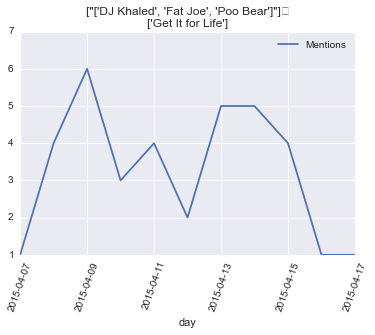

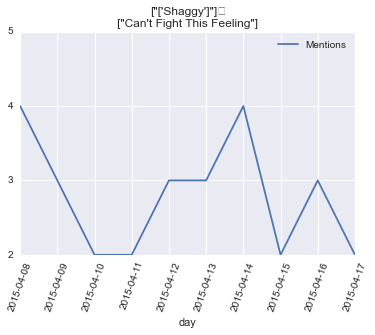

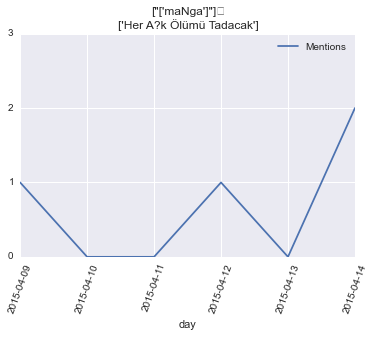

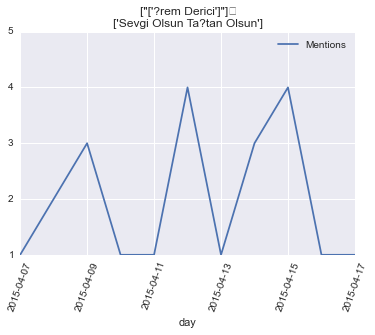

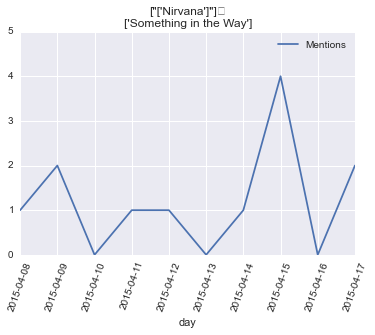

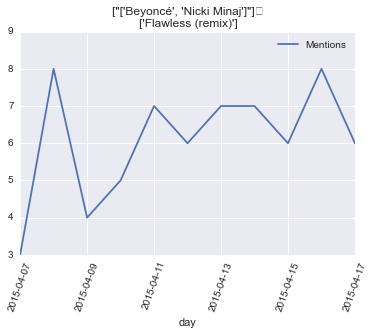

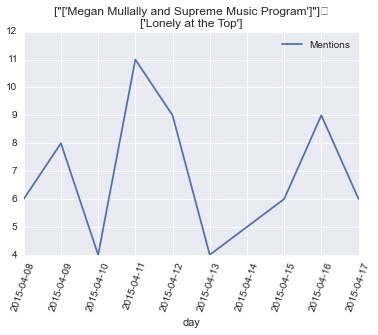

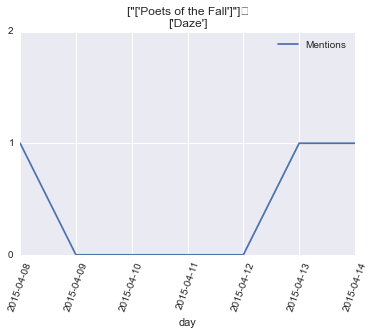

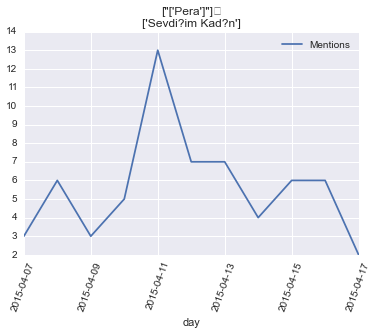

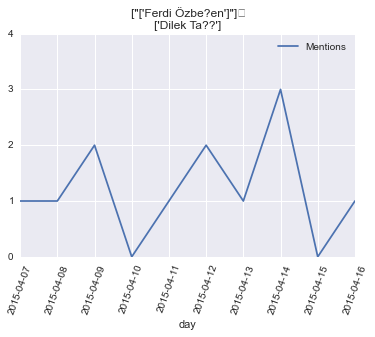

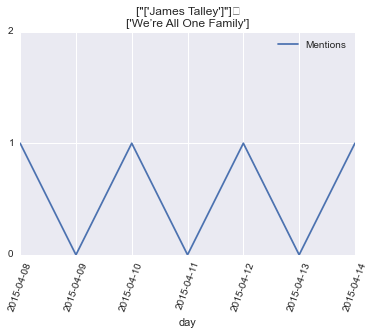

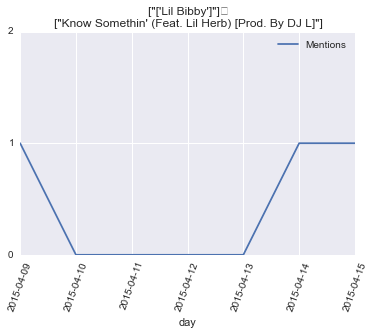

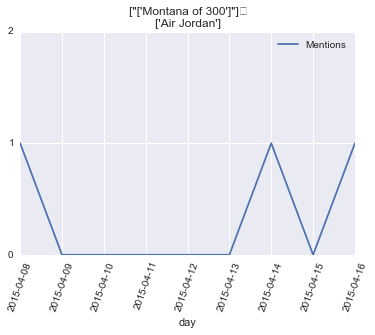

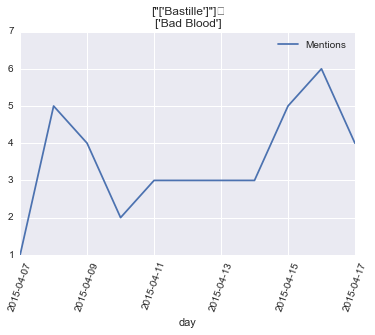

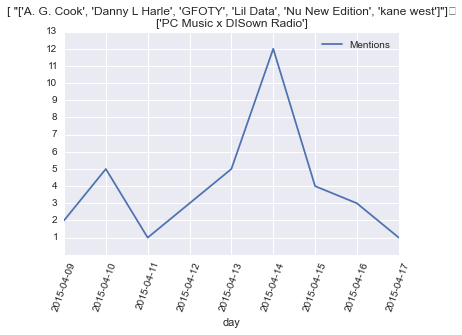

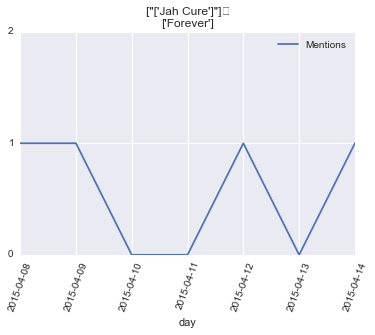

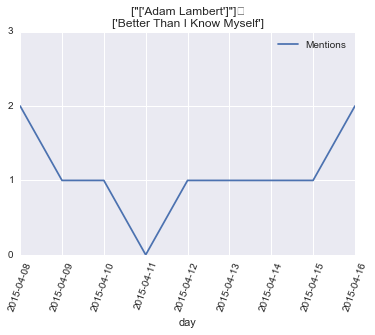

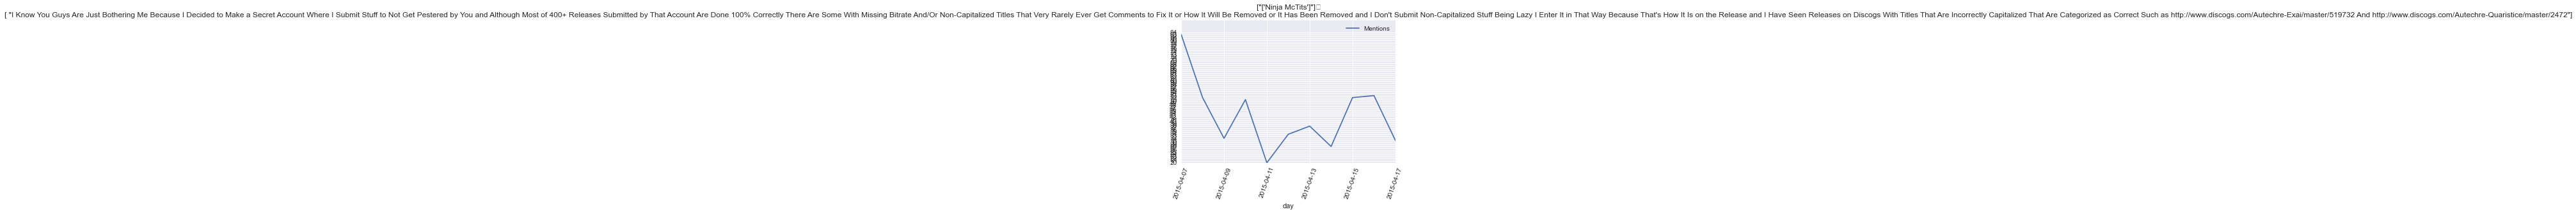

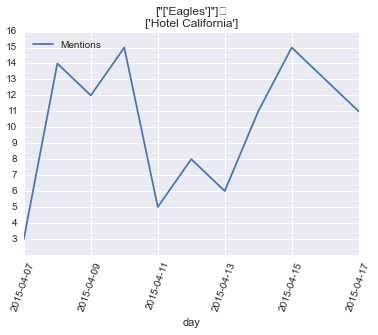

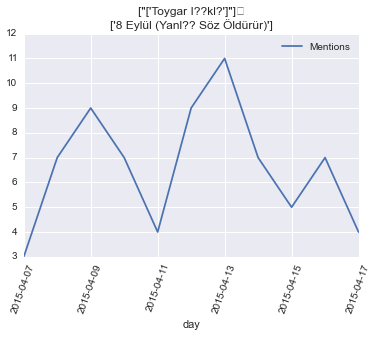

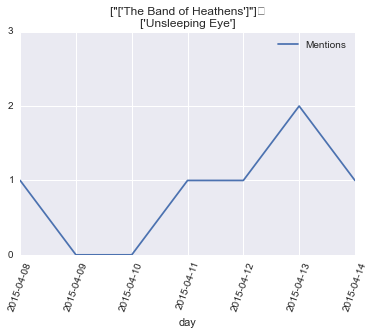

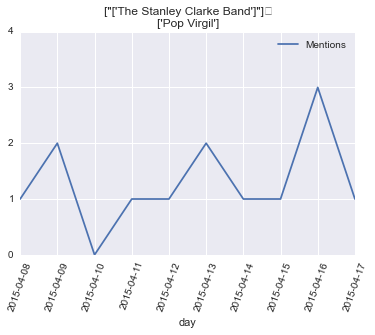

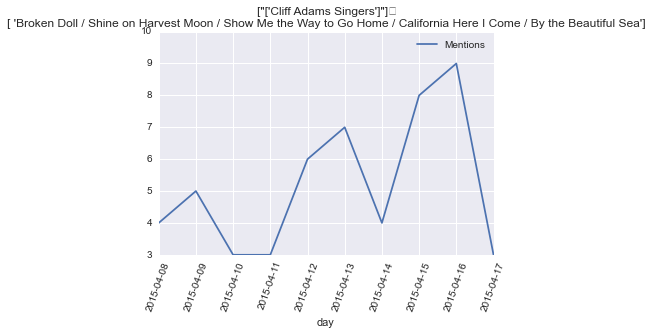

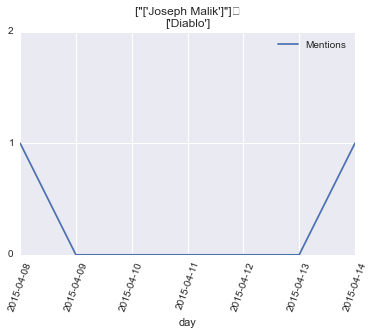

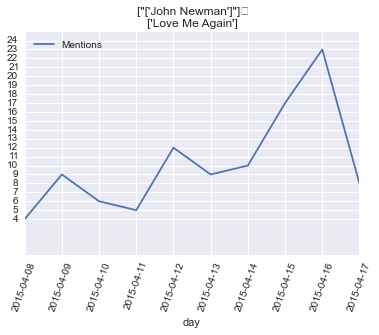

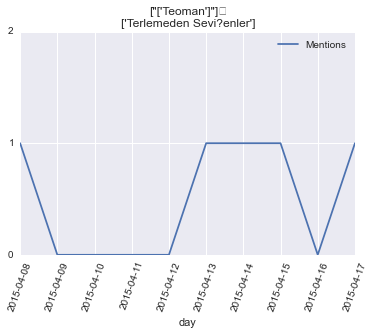

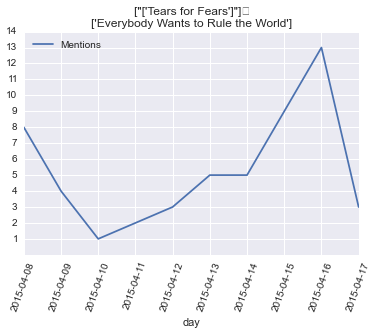

In [56]:
def draw_songb():
    count = 0;
    for unique_song in pd.unique(df_correct.mbid.ravel())[:100]:#remove slice to do all ( takes awhile )
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]        
        if(len(df_partial) >= 6):                
            df_partial_sort = df_partial.sort_values(by='day', ascending=[1])#sort on date
            pl_partial = pd.DataFrame(df_partial_sort['mentions'].values, index = df_partial_sort['day'], columns=['Mentions'])#plot
            pl_partial.plot()
            plt.yticks(np.arange(min(df_partial_sort['mentions'].values), max(df_partial_sort['mentions'].values)+2, 1.0))
            plt.xticks(rotation=70)
            title = df_songs.loc[df_songs['mbid'] == unique_song]
            plt_title = str(title.artist.values) + ("\r\n") + str(title.title.values)
            plt.title(plt_title)
            fig_title = "C:/Users/Nick/Documents/T32-MINoR/PTT4/ADS_PT_Final_Pres/public_html/img/side/Dia" + str(count) + ".png"
            plt.savefig(fig_title)
            count = count + 1

draw_songb()

In [60]:
df_songs.head(10)

,_id,artist,title,mbid
0,588008496911806467,['James Fortune & FIYA'],Live Though It,3cd89446-1133-44ca-a012-226fd562e105
1,588008500317544449,['Wings'],Aku Pun Tahu,b265efb3-17ff-4d1e-a5c4-cdc3b6852003
2,588008500594401280,['This Eternal Cold'],Too Dead to Dream,43ce2582-4366-4e6d-ac06-8cacab50bea2
3,588008516163661824,['Solo'],Luv-All-Day,bd5790a1-0dc3-4eed-a4fb-3848b9738e35
4,588008523151335425,['Hurts'],"Blood, Tears & Gold (Lotus Eaters on My Mind r...",9c8da8a8-0a30-4930-ac9b-a1995b7bdfc2
5,588008526917857281,['Good Charlotte'],Dance Floor Anthem,cacde2ee-668f-436b-823f-78dec5b68fb4
6,588008540058562560,['Sycamore Age'],How to Hunt a Giant Butterfly,e7e12773-126d-4f0a-a5c2-b4a0927f8c2d
7,588008546308087809,['Lefthanded'],Ku kehilangan cinta tiga dimensi,bc49b40f-a784-4180-9a8e-1bec7ffe2893
8,588008548531044352,['Train'],Calling All Angels,34fdbc74-5a4e-4cc9-aaac-250e7c832fcf
9,588008560950390785,['S.A.R.S.'],Neka te kraj mene,4a9d4d1f-b3ae-481d-8ad7-ab4c8bf17965


In [59]:
df_correct.head(10)

,mbid,day,mentions
0,3cd89446-1133-44ca-a012-226fd562e105,2015-04-11,2
1,3cd89446-1133-44ca-a012-226fd562e105,2015-04-13,2
2,3cd89446-1133-44ca-a012-226fd562e105,2015-04-09,1
3,3cd89446-1133-44ca-a012-226fd562e105,2015-04-10,1
4,3cd89446-1133-44ca-a012-226fd562e105,2015-04-12,1
5,3cd89446-1133-44ca-a012-226fd562e105,2015-04-14,2
6,3cd89446-1133-44ca-a012-226fd562e105,2015-04-17,1
7,3cd89446-1133-44ca-a012-226fd562e105,2015-04-16,1
8,b265efb3-17ff-4d1e-a5c4-cdc3b6852003,2015-04-09,2
9,b265efb3-17ff-4d1e-a5c4-cdc3b6852003,2015-04-10,5


In [26]:
import scipy as sp
import pandas as pd

def calc_pears():
    print(("artist: \t\t") + ("song: \t\t") + ("\t\t Pearsonr: ")  + ("\t\t p-value: "))
    for unique_song in pd.unique(df_correct.mbid.ravel())[:100]:#remove slice to do all ( takes awhile )
        df_partial = df_correct.loc[df_correct['mbid'] == unique_song]        
        if(len(df_partial) >= 6):                
            df_partial_sort = df_partial.sort_values(by='day', ascending=[1])#sort on date
            pl_partial = pd.DataFrame(df_partial_sort['mentions'].values, index = df_partial_sort['day'], columns=['Mentions'])#plot
            pl_partial['days_num'] = pd.Series(range(len(pl_partial)), index=pl_partial.index)
            pearsr = sp.stats.pearsonr(pl_partial.Mentions.values, pl_partial.days_num.values)
            title = df_songs.loc[df_songs['mbid'] == unique_song]
            plt_title = str(title.artist.values) + ("\t\t") + str(title.title.values)
            print(plt_title + ("\t\t") + "%.2f" % pearsr[0] + ("\t\t") + "%.2f" % pearsr[1])


# stats.pearsonr()
calc_pears()

artist: 		song: 				 Pearsonr: 		 p-value: 
["['James Fortune & FIYA']"]		['Live Though It']		-0.21		0.60
["['Wings']"]		['Aku Pun Tahu']		-0.19		0.62
["['Hurts']"]		['Blood, Tears & Gold (Lotus Eaters on My Mind remix by Pantha du Prince)']		-0.39		0.23
["['Good Charlotte']"]		['Dance Floor Anthem']		0.41		0.41
["['Train']"]		['Calling All Angels']		0.40		0.22
["['S.A.R.S.']"]		['Neka te kraj mene']		0.00		1.00
["['Cem Adrian']"]		['Mutlu Y?llar']		0.32		0.33
["['Mumm-Ra']"]		["She's Got You High"]		0.35		0.36
["['Erykah Badu']"]		['Next Lifetime']		0.61		0.06
["['Gökhan Türkmen']"]		['Dön']		0.08		0.81
["['Wale']"]		['The Girls On Drugs']		0.87		0.00
["['Duman']"]		['Deli']		-0.08		0.83
["['Haddaway']"]		['What Is Love']		0.79		0.01
["['AC/DC']"]		['Thunderstruck']		0.38		0.25
["['Manika']"]		['Vegas Party (Jump Smokers Remix)']		-0.04		0.92
["['Golden Earring']"]		['Radar Love']		0.33		0.32
["['The Whispers']"]		['Rock Steady']		0.23		0.50
["['Myles Kennedy and The Conspirators', 'S

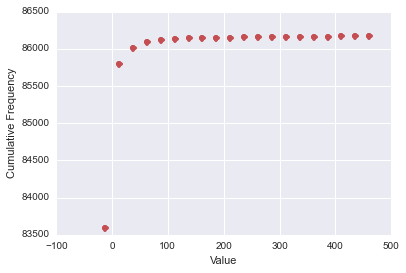

In [36]:
cumfreqs, lowlim, binsize, _ = sp.stats.cumfreq(df_correct.mentions.values, numbins=20)

x = np.arange(cumfreqs.size) * binsize + lowlim

plt.plot(x, cumfreqs, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')

plt.show()